¿Comprar o alquilar?

Ejemplo de Naive Bayes en Python

Ejemplo extraido de la siguiente página:
http://www.aprendemachinelearning.com/comprar-casa-o-alquilar-naive-bayes-usando-python/

In [3]:
#importando librerías

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sb

In [4]:
#ajustes para las gráficas
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [5]:
#Importamos las funciones
#que utilizaremos

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest

In [6]:
#Cargamos el archivo .csv descargado de la siguiente liga:
#www.aprendemachinelearning.com/wp-content/uploads/2018/08/comprar_alquilar.csv

dataframe = pd.read_csv(r"comprar_alquilar.csv")
dataframe.head(10) #Para explorar el dataframe

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
5,5692,911,11,325,50875,360863,1,4,5,1
6,6830,1298,345,309,46761,429812,1,1,5,1
7,6470,1035,39,782,57439,606291,0,0,1,0
8,6251,1250,209,571,50503,291010,0,0,3,1
9,6987,1258,252,245,40611,324098,2,1,7,1


variables del dataframe:

*ingresos: los ingresos de la familia mensual

*gastos comunes: pagos de luz, agua, gas, etc mensual

*pago coche: si se está pagando cuota por uno o más   coches, y los gastos en combustible, etc al mes.

*gastos_otros: compra en supermercado y lo necesario para vivir al mes

*ahorros: suma de ahorros dispuestos a usar para la compra de la casa.

*vivienda: precio de la vivienda que quiere comprar esa familia

*estado civil:
        0-soltero
        1-casados
        2-divorciados

*hijos: cantidad de hijos menores y que no trabajan.

*trabajo:
        0-sin empleo 1-autónomo (freelance)
        2-empleado
        3-empresario
        4-pareja: autónomos
        5-pareja: empleados
        6-pareja: autónomo y asalariado
        7-pareja:empresario y autónomo
        8-pareja: empresarios los dos o empresario y empleado

*comprar: 0-No comprar 1-Comprar (esta será nuestra columna de salida, para aprender)

 supuestos para el problema formulado:

*Está pensado en Euros pero podría ser cualquier otra moneda
*No tiene en cuenta ubicación geográfica, cuando sabemos que dependerá mucho los precios de los inmuebles de distintas zonas
*Se supone una hipoteca fija a 30 años con interés de mercado “bajo”.


In [7]:
dataframe

,ingresos,gastos_comunes,pago_coche,gastos_otros,ahorros,vivienda,estado_civil,hijos,trabajo,comprar
0,6000,1000,0,600,50000,400000,0,2,2,1
1,6745,944,123,429,43240,636897,1,3,6,0
2,6455,1033,98,795,57463,321779,2,1,8,1
3,7098,1278,15,254,54506,660933,0,0,3,0
4,6167,863,223,520,41512,348932,0,0,3,1
5,5692,911,11,325,50875,360863,1,4,5,1
6,6830,1298,345,309,46761,429812,1,1,5,1
7,6470,1035,39,782,57439,606291,0,0,1,0
8,6251,1250,209,571,50503,291010,0,0,3,1
9,6987,1258,252,245,40611,324098,2,1,7,1


In [8]:
#Veamos los registros en los que se recomienda
#comprar y en los que no
print(dataframe.groupby('comprar').size())

comprar
0    135
1     67
dtype: int64


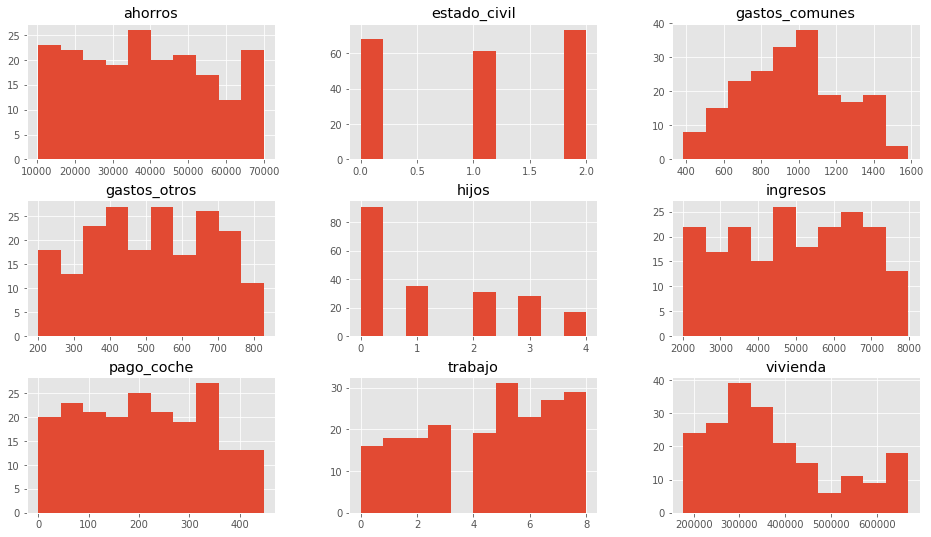

In [9]:
#Realicemos histogramas de las caracteristicas
#sin tomar la variable de respuesta (comprar)

dataframe.drop(['comprar'],axis=1).hist()
plt.show()

Agrupamos algunas variables y crearemos una nueva la cual será la resta del precio de la vivienda con lo ahorros de la familia

In [10]:
dataframe['gastos']=(dataframe['gastos_comunes']+dataframe['gastos_otros']+dataframe['pago_coche'])
dataframe['financiar']=dataframe['vivienda']-dataframe['ahorros']
dataframe.drop(['gastos_comunes','gastos_otros','pago_coche'], axis=1).head(10)

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
0,6000,50000,400000,0,2,2,1,1600,350000
1,6745,43240,636897,1,3,6,0,1496,593657
2,6455,57463,321779,2,1,8,1,1926,264316
3,7098,54506,660933,0,0,3,0,1547,606427
4,6167,41512,348932,0,0,3,1,1606,307420
5,5692,50875,360863,1,4,5,1,1247,309988
6,6830,46761,429812,1,1,5,1,1952,383051
7,6470,57439,606291,0,0,1,0,1856,548852
8,6251,50503,291010,0,0,3,1,2030,240507
9,6987,40611,324098,2,1,7,1,1755,283487


In [11]:
#Resumen estadistico de pandas
reduced = dataframe.drop(['gastos_comunes','gastos_otros','pago_coche'],axis=1)
reduced.describe()
#registros
#promedio
#desv est
#min
#cuartiles

,ingresos,ahorros,vivienda,estado_civil,hijos,trabajo,comprar,gastos,financiar
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4958.995050,38749.668317,373349.638614,1.024752,1.232673,4.490099,0.331683,1698.752475,334599.970297
std,1682.862556,17365.231870,136371.525622,0.837184,1.367833,2.535794,0.471988,324.838005,126607.099497
min,2008.000000,10319.000000,176553.000000,0.000000,0.000000,0.000000,0.000000,1007.000000,154716.000000
25%,3513.750000,24964.250000,274810.000000,0.000000,0.000000,2.000000,0.000000,1430.500000,240410.250000
50%,4947.500000,38523.000000,340783.500000,1.000000,1.000000,5.000000,0.000000,1669.500000,301177.000000
75%,6374.500000,52150.750000,444482.000000,2.000000,2.000000,7.000000,1.000000,1928.000000,393413.000000
max,7984.000000,69934.000000,669540.000000,2.000000,4.000000,8.000000,1.000000,2543.000000,618621.000000


In [12]:
#Con sklearn seleccionaremos las 5 mejores
#caracteristicas usando SelectKBest

x=dataframe.drop(['comprar'],axis=1)
y=dataframe['comprar']

best=SelectKBest(k=5)
x_new=best.fit_transform(x,y)
x_new.shape
selected = best.get_support(indices=True)
print(x.columns[selected])

Index(['ingresos', 'ahorros', 'hijos', 'trabajo', 'financiar'], dtype='object')


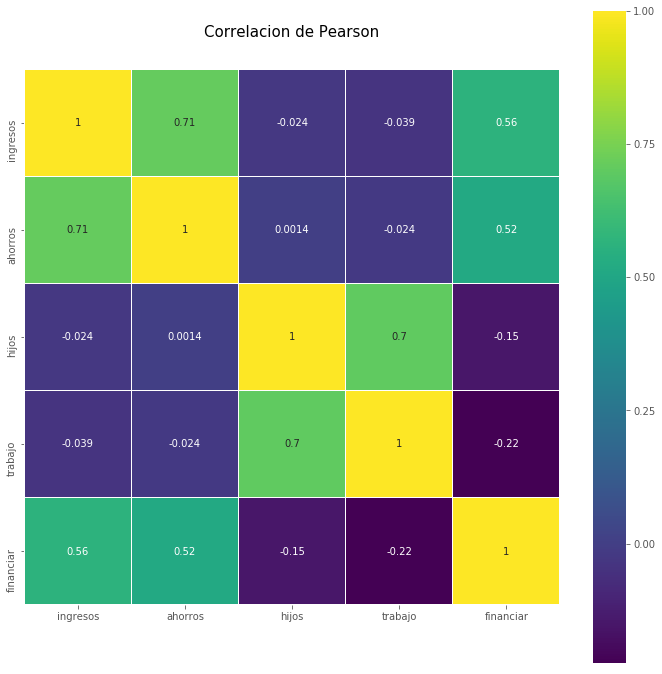

In [14]:
#Veamos la correlación entre las variables seleccionadas

used_features =x.columns[selected]
 
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Correlacion de Pearson', y=1.05, size=15)
sb.heatmap(dataframe[used_features].astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [15]:
xtrain,xtest=train_test_split(dataframe,test_size=0.2,random_state=6)
ytrain=xtrain['comprar']
ytest=xtest['comprar']

In [16]:
#Creamos nuestro modelo

gnb = GaussianNB()

gnb.fit(xtrain[used_features].values,ytrain)
ypred=gnb.predict(xtest[used_features])

print('Presición del set de entrenamiento: {:.2f}'
     .format(gnb.score(xtrain[used_features],ytrain)))
print('Presición en el set de test: {:.2f}'
     .format(gnb.score(xtest[used_features],ytest)))

Presición del set de entrenamiento: 0.87
Presición en el set de test: 0.90


Hagamos 2 predicciones:

Caso 1: Familia sin hijos con 2 000€ de ingresos que quiere comprar una casa de 200 000€ y solo tiene 5 000€

Caso 2: Familia con 2 hijos con ingresos de 6 000€, 34 000€ en ahorros y consultan si comprar una casa de 320 000€


In [18]:
#variables          ingresos, ahorros, hijos, trabajo, financiar 
print(gnb.predict([[2000,     5000,    0,     5,       200000],
                   [6000,     34000,   2,     5,       320000]]))
#0:=Alquilar 1:=Comprar

[0 1]
